An Analysis of @SullyBusiness

In [14]:
install.packages("dplyr")
library("dplyr")

install.packages("xlsx")
library("xlsx")

install.packages("tm")  # for text mining
library("tm")

install.packages("SnowballC") # for text stemming
library("SnowballC")

install.packages("wordcloud") # word-cloud generator 
library("wordcloud")

install.packages("RColorBrewer") # color palettes
library("RColorBrewer")

install.packages("stringr")
library("stringr")

install.packages("tidytext")
library("tidytext")

install.packages("ggplot2")
library("ggplot2")


  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  1.0.6  1.0.7              TRUE

  Binaries will be installed


Warning message:
"package 'dplyr' is in use and will not be installed"Warning message:
"package 'xlsx' is in use and will not be installed"Warning message:
"package 'tm' is in use and will not be installed"Warning message:
"package 'SnowballC' is in use and will not be installed"Warning message:
"package 'wordcloud' is in use and will not be installed"Warning message:
"package 'RColorBrewer' is in use and will not be installed"Warning message:
"package 'stringr' is in use and will not be installed"


  There is a binary version available but the source version is later:
         binary source needs_compilation
tidytext  0.3.1  0.3.2             FALSE



installing the source package 'tidytext'




  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



In [3]:
df = read.xlsx2("data/@sullybusiness_user_tweets.xlsx",1,header=T)
head(df,1)
nrow(df)
colnames(df)

Tweet.Id,Text,Name,Screen.Name,UTC,Created.At,Favorites,Retweets,Language,Client,Tweet.Type,URLs,Hashtags,Mentions,Media.Type,Media.URLs
1451971420888649737,@CaptainNasdaq Mark Cuban? nice <U+0001F90C><U+0001F345><U+0001F525>,Bryant Suellentrop,SullyBusiness,2021-10-23T17:58:57.000Z,Sat Oct 23 17:58:57 +0000 2021,1,0,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Reply,,0,1,,


[1] 3200

[1] "Tweet.Id"    "Text"        "Name"        "Screen.Name" "UTC"        
 [6] "Created.At"  "Favorites"   "Retweets"    "Language"    "Client"     
[11] "Tweet.Type"  "URLs"        "Hashtags"    "Mentions"    "Media.Type" 
[16] "Media.URLs"

In [111]:
x = "Olive Garden|olive garden|olivegarden|breadstick|Italian"
temp = df %>% mutate(flag=ifelse(grepl(x, Text), 1, 0)) %>% select(Text,flag) %>% filter(flag==1)

nrow(temp)
temp$Text

[1] 26

[1] "Idk why @olivegarden gets so much hate.\n\nI mean look at this delicious and authentic Italian cuisine. "                                                                                                                               
 [2] "I mean, he’s right.\n\nEvery time I’ve taken a potential customer to Olive Garden we’ve landed the contract. <U+0001F956><U+0001F4B0> "                                                                                                 
 [3] "@jkostecki_rei @DouglasDowellJD @hexagraeme @LiamKircher Idk man the authentic Italian places charge like crazy and we busy as ever. Consumers have the taste for it to be sustainable, just not everywhere."                           
 [4] "@LiamKircher Asking a man why he likes unlimited breadsticks and salad is, well foolish at best."                                                                                                                                       
 [5] "@NickatFP <U+2611><U+FE0F>Olive Garden\n<U+2611><U+FE0F>Employee Issues\n<U+2611><U+FE0F><U+0001F476><U+0001F3FB>\n<U+274C> k club"                                                                                                     
 [6] "@girdley Wrong.\n\nBest part is you are never further than five miles from an Olive Garden. "                                                                                                                                           
 [7] "Feeling super grateful for all folks who have brought our family imitation Olive Garden this week.\n\nHas made adjusting to life with the baby much easier.\n\nStill not quite as tasty as the OG."                                     
 [8] "@joewebber_ @valueterminal @Fazolis Get out of here with that fake Olive Garden. "                                                                                                                                                      
 [9] "Should have grabbed him some salad and breadsticks (unlimited)\n\nNobody would turn that down. <U+0001F957><U+0001F956>"                                                                                                                
[10] "RT @SpiritofPines : It is unbelievably simple to become a millionaire.\n\nStep : Order unlimited breadsticks from Olive Garden.\n\nStep : Resell for $ a piece\n\nStep : Repeat  million times.\n\nStep : You’re a literal millionaire."
[11] "@StudentRentPro Shots fired at Olive Garden? "                                                                                                                                                                                          
[12] "@CaptainNasdaq bf who likes Olive Garden, gf who likes Olive Garden"                                                                                                                                                                    
[13] "Why do all great men want the same thing and why is it @olivegarden?"                                                                                                                                                                   
[14] "Business idea:\n\nOlive Garden as a service. \n\n$k. (per year)\n\nWe deliver unlimited breadsticks and salad to you whenever and wherever you want.\n\nDoes that work?"                                                                
[15] "@girdley You misspelled Olive Garden. <U+0001F956>"                                                                                                                                                                                     
[16] "@ERodz I've never had unlimited salad and breadsticks at Chilis...have you?\n\nNo? That's what I thought. "                                                                                                                             
[17] "@Molson_Hart I haven't seen anything this polarizing since the @Chilis vs @olivegarden debate."                                                                            

In [115]:
x = "Olive Garden|olive garden|olivegarden|breadstick|Italian"
tweets_olivegarden = df %>% filter(ifelse(grepl(x, Text),TRUE,FALSE)) %>% select(Text)
nrow(tweets_olivegarden)
tweets_olivegarden

[1] 26

Text
Idk why @olivegarden gets so much hate. I mean look at this delicious and authentic Italian cuisine.
"I mean, he’s right. Every time I’ve taken a potential customer to Olive Garden we’ve landed the contract. <U+0001F956><U+0001F4B0>"
"@jkostecki_rei @DouglasDowellJD @hexagraeme @LiamKircher Idk man the authentic Italian places charge like crazy and we busy as ever. Consumers have the taste for it to be sustainable, just not everywhere."
"@LiamKircher Asking a man why he likes unlimited breadsticks and salad is, well foolish at best."
@NickatFP <U+2611><U+FE0F>Olive Garden <U+2611><U+FE0F>Employee Issues <U+2611><U+FE0F><U+0001F476><U+0001F3FB> <U+274C> k club
@girdley Wrong. Best part is you are never further than five miles from an Olive Garden.
Feeling super grateful for all folks who have brought our family imitation Olive Garden this week. Has made adjusting to life with the baby much easier. Still not quite as tasty as the OG.
@joewebber_ @valueterminal @Fazolis Get out of here with that fake Olive Garden.
Should have grabbed him some salad and breadsticks (unlimited) Nobody would turn that down. <U+0001F957><U+0001F956>
RT @SpiritofPines : It is unbelievably simple to become a millionaire. Step : Order unlimited breadsticks from Olive Garden. Step : Resell for $ a piece Step : Repeat million times. Step : You’re a literal millionaire.


In [114]:
x = "Chili"
tweets_chilis = df %>% filter(ifelse(grepl(x, Text),TRUE,FALSE)) %>% select(Text)
nrow(tweets_chilis)
tweets_chilis

[1] 8

Text
"@girdley ~% is Chili’s propaganda so ~% is lies, exaggeration, BS"
@girdley saw the same guy at Chili’s (@Cokedupoptions)
@ERodz I've never had unlimited salad and breadsticks at Chilis...have you? No? That's what I thought.
@Molson_Hart I haven't seen anything this polarizing since the @Chilis vs @olivegarden debate.
"@girdley In my book, “He’s that @Chilis guy.”"
.@olivegarden&gt;@Chilis&gt;@DaveRamsey
Might have to go for some Olive Garden after this dub. (better than @Chilis)
.@olivegarden &gt; @Chilis All <U+0001F4E0> no <U+0001F5A8>.


Joining, by = "word"
Selecting by n


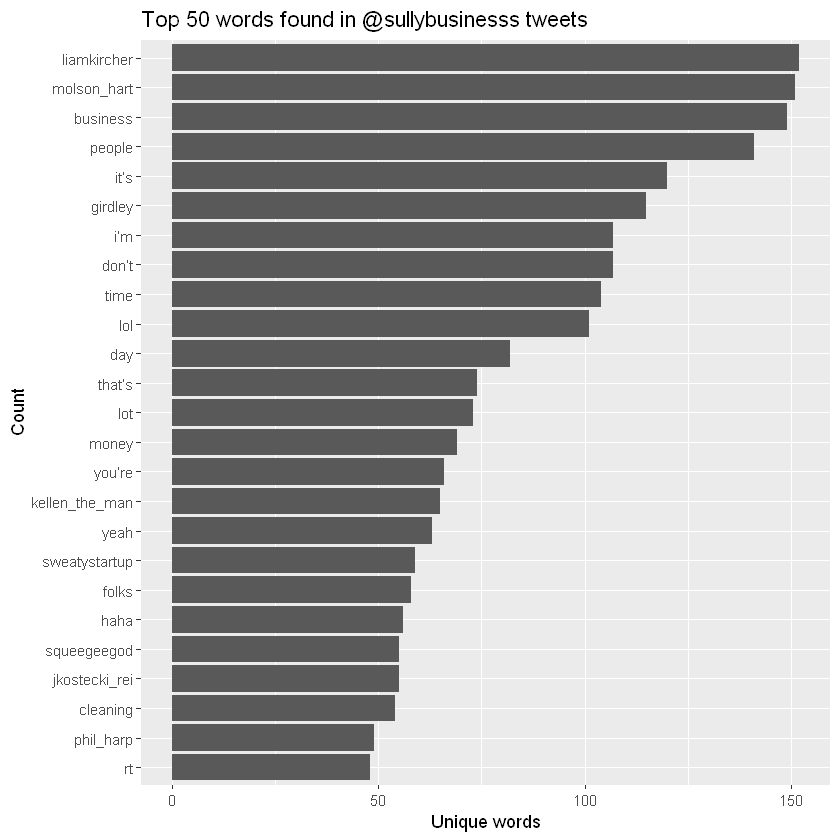

In [113]:
df = read.xlsx2("data/@sullybusiness_user_tweets.xlsx",1,header=T)

# Remove URL
df$Text = gsub("http.*","", df$Text)

# Remove numbers
df$Text = gsub("[[:digit:]]","", df$Text)

# Split into words
clean_tweets = df %>% select(Tweet.Id,Text) %>% unnest_tokens(output=word,input=Text)

# Remove stop words
data("stop_words")
cleaned_tweet_words <- clean_tweets %>%
  anti_join(stop_words)

# Print to csv
wordfreq = cleaned_tweet_words %>% count(word, sort=TRUE)
write.csv(wordfreq,"data/wordfreq.csv", row.names = FALSE)

# Graph top words
cleaned_tweet_words %>%
  count(word, sort = TRUE) %>%
  top_n(25) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(x = word, y = n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() +
      labs(x = "Count",
      y = "Unique words",
      title = "Top 50 words found in @sullybusinesss tweets")

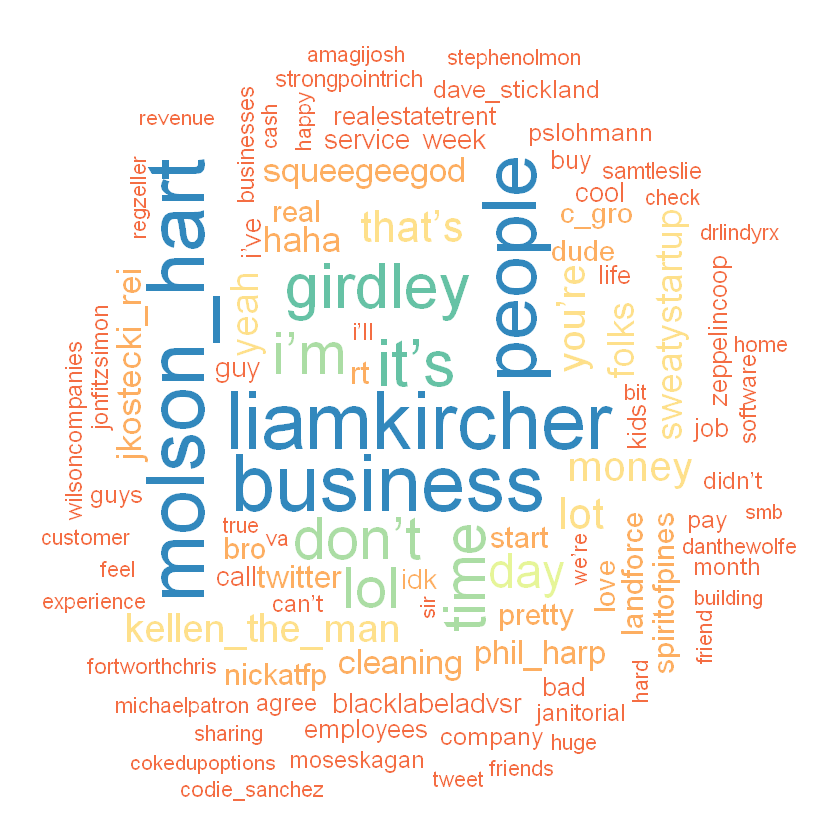

In [100]:
set.seed(333)
wordcloud(words = wordfreq$word, freq = wordfreq$n, min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Spectral"))